In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def getDataFrameFromCSV(filePath):
    df = pd.read_csv(filePath + '.csv')
    return df

In [4]:
def createPlot(dataFrame, columnName, plotTitle = "", weight = "1"):
    colValues = dataFrame[columnName]
    dateValues = dataFrame['date']
    ypoints = np.array(colValues)
    xpoints = np.array(dateValues)
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(6)
    plt.plot(xpoints, ypoints, color='green')
    plt.title(plotTitle+ "\n unit:"+ weight)
    plt.xlabel("days")
    plt.ylabel("price")
    plt.show()

In [5]:
df = getDataFrameFromCSV('../../data/price_data/oil/oil')

In [6]:
print("Sample Data:")
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
print(df.head(10))

Sample Data:
                         product_name weight_raw  weight_value weight_unit  \
0  Muskan Gold Fortified Soyabean Oil      5 ltr             5         ltr   
1        Pusti Fortified Soyabean Oil      5 ltr             5         ltr   
2        Fresh Fortified Soyabean Oil      5 ltr             5         ltr   
3         Teer Fortified Soyabean Oil      2 ltr             2         ltr   
4        Fresh Fortified Soyabean Oil      1 ltr             1         ltr   
5         Teer Fortified Soyabean Oil      5 ltr             5         ltr   
6  Teer Fortified Soyabean Oil (Poly)      1 ltr             1         ltr   
7        Fresh Fortified Soyabean Oil      2 ltr             2         ltr   
8            Radhuni Pure Mustard Oil     500 ml           500          ml   
9        Satej Fortified Soyabean Oil      2 ltr             2         ltr   

  price_raw  price discount_price_raw  discount_price       date      time  
0     ৳ 879    879                NaN             N

In [7]:
def showLineGraph(dataFrame, item, weight, weightRaw):
    df = dataFrame
    itemName = item
    filteredDf = df.loc[(df.product_name == itemName) & (df.weight_value == weight)]
    createPlot(filteredDf, 'price', itemName, weightRaw)

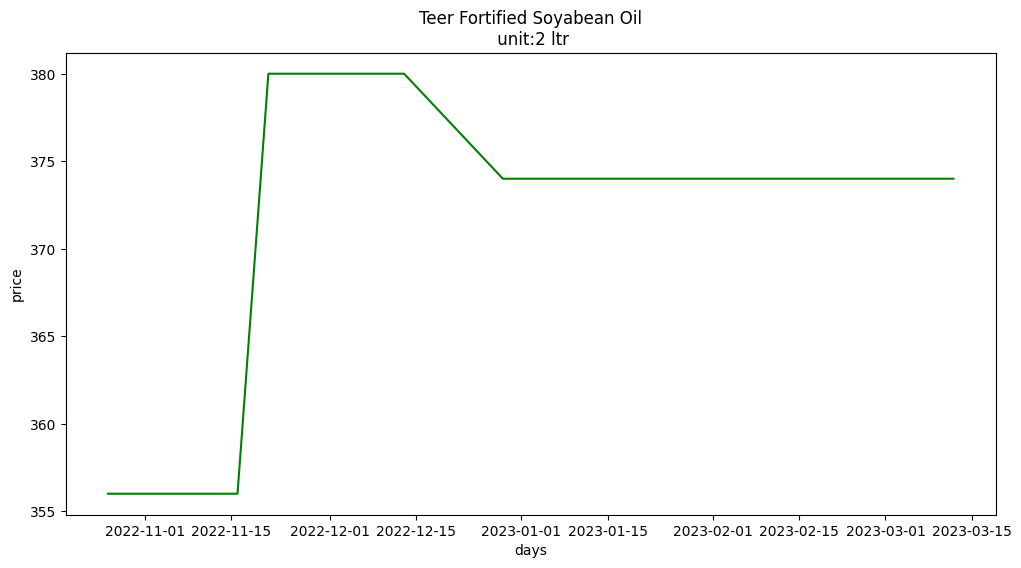

In [8]:
showLineGraph(df, "Teer Fortified Soyabean Oil", 2, "2 ltr")

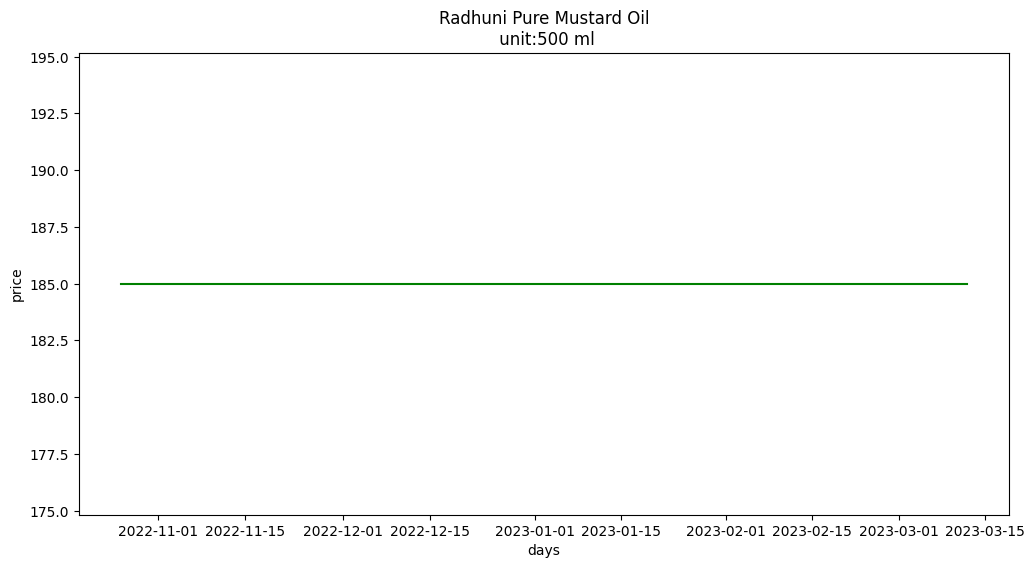

In [9]:
showLineGraph(df, "Radhuni Pure Mustard Oil", 500, "500 ml")

In [10]:
def createMultilinePlot(dataFrames, columnNames, plotTitle = "", weight = "1"):
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(6)
    i = 0
    colors = ['green', 'blue']
    for dataFrame, columnName in zip(dataFrames, columnNames):
        #dataFrame.head(3)
        colValues = dataFrame[columnName]
        dateValues = dataFrame['date']
        ypoints = np.array(colValues)
        xpoints = np.array(dateValues)
        plt.plot(xpoints, ypoints, color=colors[i])
        i += 1
        i %= 2
    #plt.title(plotTitle+ "\n unit:"+ weight)
    plt.xlabel("days")
    plt.ylabel("price BDT")
    plt.show()

In [11]:
def showMultipleLineGraph(dataFrame, items, weights, weightRaws):
    filteredDfs = []
    itemNames = []
    df = dataFrame
    for itemName, weight in zip(items,weights):
        itemNames.append(itemName)
        filteredDf = df.loc[(df.product_name == itemName) & (df.weight_value == weight)]
        filteredDfs.append(filteredDf)
    createMultilinePlot(filteredDfs, ['price','price'], itemNames, weightRaws)

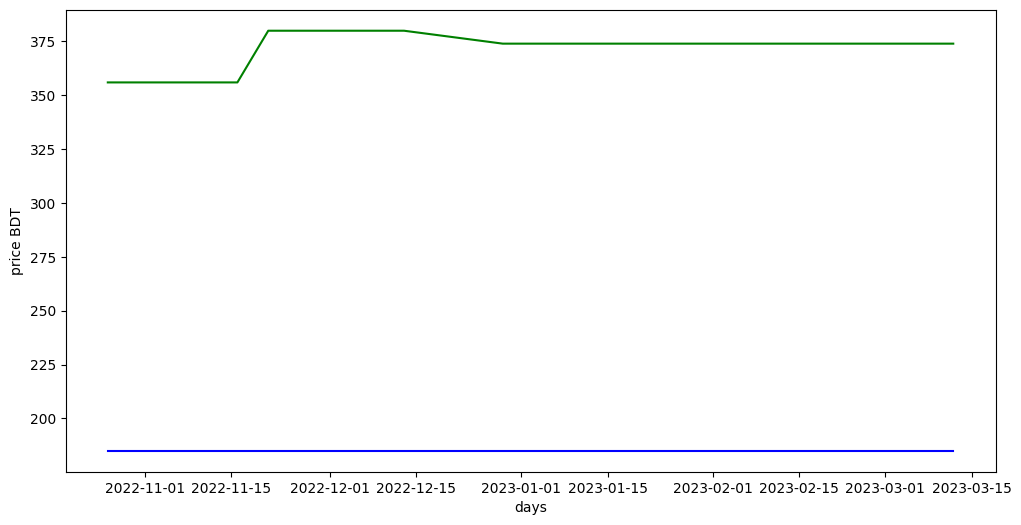

In [12]:
items = ["Teer Fortified Soyabean Oil", "Radhuni Pure Mustard Oil"]
showMultipleLineGraph(df, items, [2,500], [ "2 ltr","500 ml"])